# Decision Tree Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

## Importing the dataset

In [ ]:
dataset = pd.read_csv('WF_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

##Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Decision Tree Regression model on the whole dataset

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
start_train = time.time()
regressor.fit(X_train, y_train)
end_train = time.time()

##Predicting the Test set results

In [ ]:
row1 = [1., 1., 2., 0.1, 0., 9.2062,	-4.8659]
X_t = np.array([row1])
print(X_t)

regressor.predict(X_t)

[[ 1.      1.      2.      0.1     0.      9.2062 -4.8659]]


array([0.5510573])

In [ ]:
start_pred = time.time()
y_pred = regressor.predict(X_test)
end_pred = time.time()

## Plot

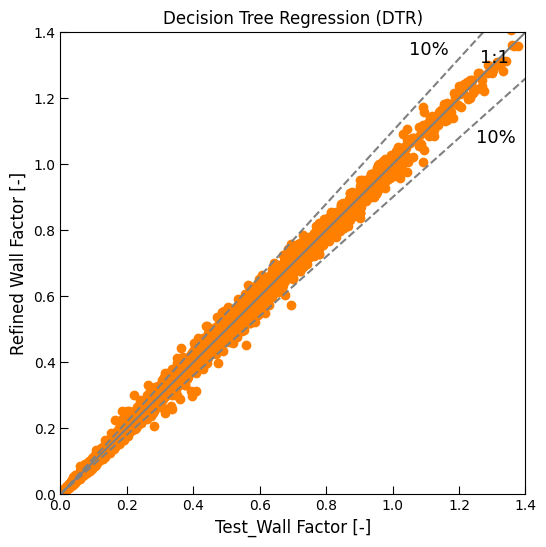

In [ ]:
import matplotlib.pyplot as plt


# Set the font to Helvetica (widely available)
plt.rcParams['font.family'] = 'Helvetica'

# Stronger Orange for 20% Deviation Lines
strong_orange = '#FF7F00'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(y_test, y_pred, color=strong_orange, marker='o')

# Labels and title
plt.xlabel("Test_Wall Factor [-]", fontsize=12,)
plt.ylabel("Refined Wall Factor [-]", fontsize=12)
plt.title("Decision Tree Regression (DTR)", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

plt.show()

## ML models metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

R-squared (R²): 0.9974121584456666
Root Mean Squared Error (RMSE): 0.012733015190854501
Mean Squared Error: 0.00016212967585053147
Mean Absolute Error (MAE): 0.008412603502014502


In [ ]:
import time

# Measure training time
training_time = end_train - start_train

# Measure prediction time
prediction_time = end_pred - start_pred

print(f"Training Time: {training_time:.5f} seconds")
print(f"Prediction Time: {prediction_time:.5f} seconds")

Training Time: 0.52928 seconds
Prediction Time: 0.01245 seconds


## Vancouver Building WF

##Import Exp_data

In [ ]:
dataset = pd.read_csv('VB_EXP.csv')
X_VB = dataset.iloc[:, :-1].values
y_VB = dataset.iloc[:, -1].values

##WF_VB prediction

In [ ]:
start_pred_VB = time.time()
y_pred_VB = regressor.predict(X_VB)
end_pred_VB = time.time()

##Plot _ VB

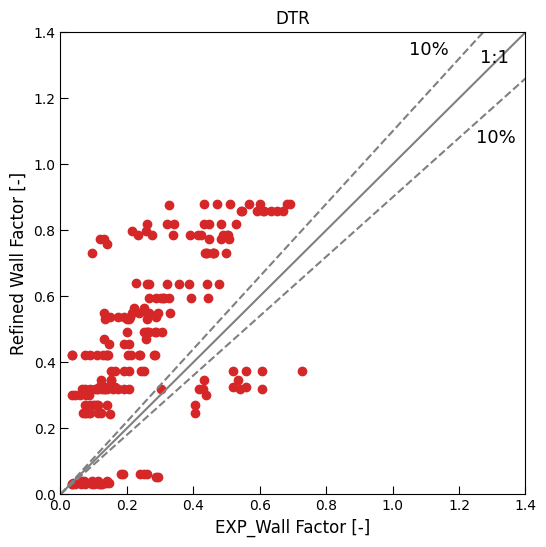

In [ ]:
import matplotlib.pyplot as plt

# Stronger Orange for 20% Deviation Lines
strong_orange = '#D62728'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(y_VB, y_pred_VB, color=strong_orange, marker='o')

# Labels and title
plt.xlabel("EXP_Wall Factor [-]", fontsize=12,)
plt.ylabel("Refined Wall Factor [-]", fontsize=12)
plt.title("DTR", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

plt.show()

##ML models metrics


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Flatten WF_EXP to 1D
y_pred_VB = y_pred_VB.flatten()


#----------------------------------------------
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient (r)
r, _ = pearsonr(y_VB, y_pred_VB)

# Compute R²
r_squared = r ** 2
print(f"R-squared (R²): {r_squared}")
#-----------------------------------------------

r2 = r2_score(y_VB, y_pred_VB)
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(y_VB, y_pred_VB))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(y_VB, y_pred_VB)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_VB, y_pred_VB)
print(f"Mean Absolute Error (MAE): {mae}")

############################

# Flatten WF_EXP to 1D
y_VB = y_VB.flatten()

# Calculate individual errors
individual_errors = (np.abs(y_pred_VB - y_VB) / y_VB) * 100
average_error = np.mean(individual_errors)

print("y_VB (first 5):", y_VB[:5])
print("y_pred_VB (first 5):", y_pred_VB[:5])
print("Individual Errors (first 5, %):", individual_errors[:5])
print(f"Average Error: {average_error:.2f}%")

R-squared (R²): 0.39140305128684233
R-squared (R²): -1.6032218150599191
Root Mean Squared Error (RMSE): 0.2766836478073017
Mean Squared Error: 0.07655384096395498
Mean Absolute Error (MAE): 0.24678183398477155
y_VB (first 5): [0.60022759 0.32155049 0.1500569  0.42873399 0.32155049]
y_pred_VB (first 5): [0.88096433 0.63872298 0.53787507 0.32002168 0.82000666]
Individual Errors (first 5, %): [ 46.77171661  98.63847075 258.44741812  25.35658737 155.0164518 ]
Average Error: 137.99%


In [ ]:
import time


# Measure VB prediction time
prediction_time_VB = end_pred_VB - start_pred_VB

print(f"Prediction Time_VB: {prediction_time_VB:.5f} seconds")

Prediction Time_VB: 0.00151 seconds


## Vancouver Building WF _______ Overhang

##Import Exp_data

In [ ]:
dataset = pd.read_csv('VB_EXP_Overhang.csv')
X_VBO = dataset.iloc[:, :-1].values
y_VBO = dataset.iloc[:, -1].values

##WF_VB prediction

In [ ]:
start_pred_VBO = time.time()
y_pred_VBO = regressor.predict(X_VBO)
end_pred_VBO = time.time()

##Plot _ VB

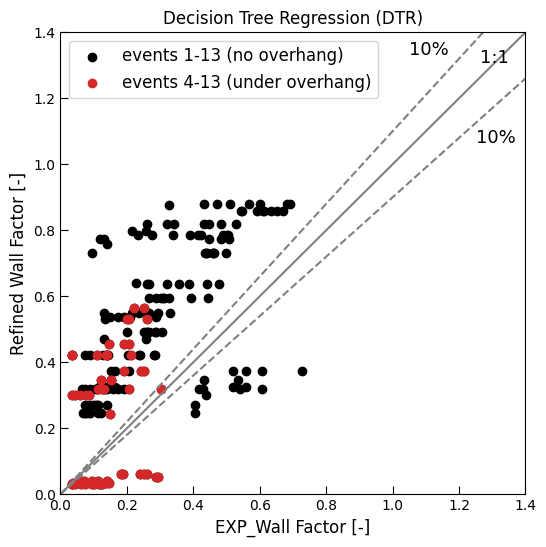

In [ ]:
import matplotlib.pyplot as plt

# Stronger Orange for 20% Deviation Lines
strong_orange = '#D62728'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(y_VB, y_pred_VB, color='k', marker='o', label='events 1-13 (no overhang)')
# Create scatter plot
plt.scatter(y_VBO, y_pred_VBO, color=strong_orange, marker='o', label='events 4-13 (under overhang)')

# Labels and title
plt.xlabel("EXP_Wall Factor [-]", fontsize=12,)
plt.ylabel("Refined Wall Factor [-]", fontsize=12)
plt.title("Decision Tree Regression (DTR)", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

# Add legend
plt.legend(loc='upper left', fontsize=12)

plt.show()

##ML models metrics


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_VBO, y_pred_VBO)
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(y_VBO, y_pred_VBO))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(y_VBO, y_pred_VBO)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_VBO, y_pred_VBO)
print(f"Mean Absolute Error (MAE): {mae}")

average_pred_VBO = sum(y_pred_VBO) / len(y_pred_VBO)
print(f"Average_pred_VB: {average_pred_VBO}")

average_VBO = sum(y_VBO) / len(y_VBO)
print(f"Average_VB: {average_VBO}")

Ave_Error = ((average_pred_VBO - average_VBO) * 100) / average_VBO
print(f"Ave_Error: {Ave_Error:.2f}%")

# Calculate individual percentage errors
individual_errors = [(abs(y_pred_VBO[i] - y_VBO[i]) / y_VBO[i]) * 100 for i in range(len(y_VBO))]
# Calculate the average error
average_error = sum(individual_errors) / len(individual_errors)
# Print the average error
print(f"Average Error: {average_error:.2f}%")

R-squared (R²): -6.014082536834454
Root Mean Squared Error (RMSE): 0.2019381596296724
Mean Squared Error: 0.04077902031461905
Mean Absolute Error (MAE): 0.1718856320714286
Average_pred_VB: 0.23466372362499993
Average_VB: 0.1450481109821429
Ave_Error: 61.78%
Average Error: 164.03%


In [ ]:
import time


# Measure VB prediction time
prediction_time_VB = end_pred_VB - start_pred_VB

print(f"Prediction Time_VB: {prediction_time_VB:.5f} seconds")

Prediction Time_VB: 0.00151 seconds


## VB Wall Factor (WF) Contour

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load data
#data = np.loadtxt('Case01_U2.csv', delimiter=',', skiprows=1)
#wf = data[:, 10]  # Python uses 0-based indexing
#y = data[:, 7]
#x = data[:, 8]

dataset_plot = pd.read_csv('VB_plot.csv')
X_VB_plot = dataset_plot.iloc[:, :].values
y = dataset_plot.iloc[:, 0] * dataset_plot.iloc[:, 5]
x = dataset_plot.iloc[:, 1] * dataset_plot.iloc[:, 6]

y_pred_VB_plot = regressor.predict(X_VB_plot)
y_pred_VB_plot = y_pred_VB_plot.ravel()
print(x.shape, y.shape, y_pred_VB_plot.shape)

(10201,) (10201,) (10201,)


Interpolated values at (xx, yy):
[0.0415607  0.0441495  0.04713541 0.053748   0.057681   0.06198525
 0.0669555  0.07157475 0.077139   0.077139   0.0836145  0.0896415
 0.0913635  0.09925227 0.10088775 0.11149384 0.11295675 0.11295675
 0.12753039 0.12863925 0.12863925 0.12863925 0.12863925 0.12863925
 0.12863925 0.12863925 0.12863925 0.12863925 0.13962448]


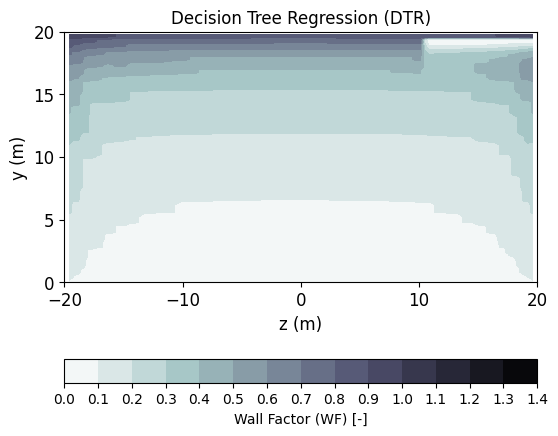

In [ ]:



# Create a grid of points for interpolation
X = np.linspace(min(x), max(x), 100)
Y = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(X, Y)

# Perform interpolation
wf_interp = griddata((x, y), y_pred_VB_plot, (X, Y), method='linear')

# Plotting
plt.figure(figsize=(6.1, 5))
contour_levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
contour = plt.contourf(X, Y, wf_interp, levels=contour_levels, cmap=plt.cm.bone_r)
plt.colorbar(contour, orientation='horizontal', ticks=contour_levels, label='Wall Factor (WF) [-]', pad=0.2)
plt.xticks(np.arange(-20, 20.0001, 10), fontsize=12)
plt.yticks(np.arange(0, 20.1, 5), fontsize=12)


# Scatter plot
xx = np.zeros(29)
yy = np.array([0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.25, 8.5, 8.75, 9, 9.2, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10])



wf_mid = griddata((x, y), y_pred_VB_plot, (xx, yy), method='linear')

# Labels and title
plt.xlabel("z (m)", fontsize=12,)
plt.ylabel("y (m)", fontsize=12)
plt.title("Decision Tree Regression (DTR)", fontsize=12)

# Print the interpolated values
print("Interpolated values at (xx, yy):")
print(wf_mid)


plt.show()
